[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Arahmanizadeh/gsproginpython/blob/main/Course1_Lesson07.ipynb)

# 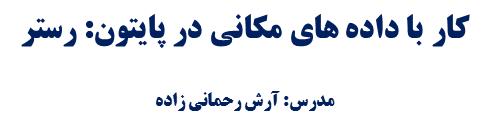

## Raster Data

A raster data model uses an array of cells, or pixels, to represent real-world objects. Raster datasets are commonly used for representing and managing imagery, surface temperatures, digital elevation models, and numerous other entities.

## Raster Data File Formats

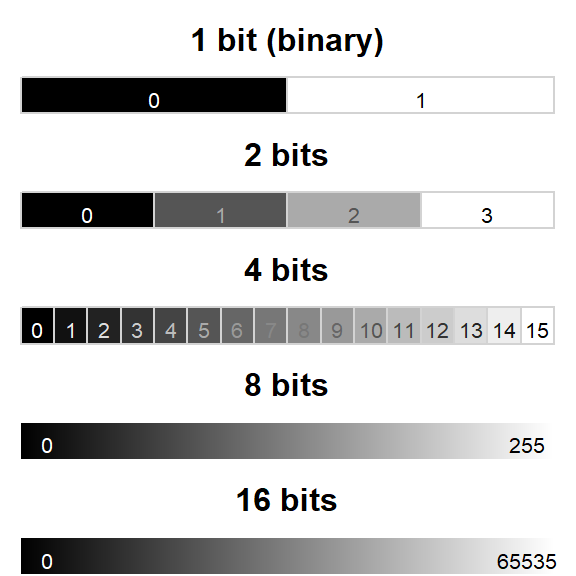

### Imagine
The Imagine file format was originally created by an image processing software company called ERDAS. This file format consists of a single **.img** file. It is sometimes accompanied by an .xml file which usually stores metadata information about the raster layer.

### GeoTiff
A popular public domain raster data format is the GeoTIFF format. </br>
If maximum portability and platform independence is important, this file format may be a good choice.

### File Geodatabase
A raster file can also be stored in a file geodatabase alongside vector files. </br> Geodatabases have the benefit of defining image mosaic structures thus allowing the user to create “stitched” images from multiple image files stored in the geodatabase. </br> Also, processing very large raster files can be computationally more efficient when stored in a file geodatabase as opposed to an Imagine or GeoTiff file format.

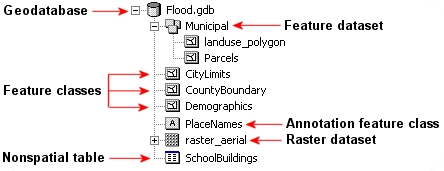

In order to work with raster data we will be using 
* rasterio 
* Xarray

Behind the scenes a numpy.ndarray does all the heavy lifting.

## Working with RasterIO

RasterIO is a modern library to work with geospatial data in a gridded format. 

RasterIO is built on top of the popular GDAL (Geospatial Data Abstraction Library). GDAL is written in C++ so the Python API provided by GDAL is not very intuitive for Python users. 

In [ ]:
!pip install rasterio

In [ ]:
import matplotlib.pyplot as plt

Z1 =  np.abs(((X - 10) ** 2 + (Y - 10) ** 2) / 1 ** 2)
Z2 =  np.abs(((X + 10) ** 2 + (Y + 10) ** 2) / 2.5 ** 2)
Z =  (Z1 - Z2)

plt.imshow(Z)
plt.title("Temperature")
plt.show()

In [ ]:
print(raster.profile)

## Update Raster Metadata
Notice the the .profile above is missing a meaningful nodata value and was uncompressed. Let’s learn how to update these values. For this we can update the .profile dictionary.

In [ ]:

print(profile)

## SRTM data

In this section, we will take 4 individual SRTM tiles around the Mt. Everest region and merge them to a single GeoTiff using RasterIO.

In [ ]:
import gdown
url = 'https://drive.google.com/uc?id=1tcBtDglL54G6GFlLW5dnsQK_bQXDe5v5'
output = 'srtm.zip'
gdown.download(url, output, quiet=False)

In [ ]:
!unzip srtm.zip

In [ ]:
import rasterio
import os
srtm_dir = 'srtm'
filename = 'N28E087.hgt'
path = os.path.join(srtm_dir, filename)

## Reading Raster Data

Finally, when we are done with the dataset, we must close it. It is especially important when writing a dataset.

## Merging Datasets

[<open DatasetReader name='python_foundation/data/srtm/N28E086.hgt' mode='r'>, <open DatasetReader name='python_foundation/data/srtm/N28E087.hgt' mode='r'>, <open DatasetReader name='python_foundation/data/srtm/N27E087.hgt' mode='r'>, <open DatasetReader name='python_foundation/data/srtm/N27E086.hgt' mode='r'>]


## Writing Raster Data

In [ ]:
output_filename = 'merged.tif'


In [ ]:

print('Successfully written output file at {}'.format(output_path))

## Working with Xarray

[Xarray](http://xarray.pydata.org/) is an evolution of rasterio and is inspired by libraries like pandas to work with raster datasets. It is particularly suited for working with multi-dimensional time-series raster datasets. It also integrates tightly with [dask](https://dask.org/) that allows one to scale raster data processing using parallel computing.

[rioxarray](https://corteva.github.io/rioxarray/stable/index.html) is an extension of xarray that makes it easy to work with geospatial rasters. You can install the `rioxarray` package from the `conda-forge` channel. 

This notebook shows how we can replicate the analysis from the [Working with RasterIO](#working-with-rasterio) exercise and also covers raster data visualization using `matplotlib`. 

### XArray and rioxarray Basics

We start by reading a single SRTM tile containing elevation values.

In [ ]:

srtm_dir = 'srtm'
filename = 'N28E087.hgt'


By convention, `rioxarray` is imported as `rxr`

The `open_rasterio()` method is able to read any data source supported by `rasterio` library.

The result is a `xarray.DataArray` object.

You can access the pixel values using the `values` property which returns the array’s data as a numpy array.

A `xarray.DataArray` object also contains 1 or more `coordinates`. Each corrdinate is a 1-dimensional array representing values along one of the data axes. In case of the 1-band SRTM elevation data, we have 3 coordinates - `x`, `y` and `band`.

A key feature of `xarray` is the ability to access slices of the dataset using [index lookup](http://xarray.pydata.org/en/stable/user-guide/indexing.html) methods. For example, we can slice the main dataset and get the data for Band1 using the `sel()` method.

The raster metadata is stored in the [`rio`](https://corteva.github.io/rioxarray/stable/rioxarray.html#rioxarray-rio-accessors) accessor. This is enabled by the `rioxarray` library which provides geospatial functions on top of `xarray`. 

In [ ]:
print('CRS:', rds.rio.crs)
print('Resolution:', rds.rio.resolution())
print('Bounds:', rds.rio.bounds())
print('Width:', rds.rio.width)
print('Height:', rds.rio.height)

### Merging Rasters

Now that you understand the basic data structure of *xarray* and the &rio* extension, let's use it to process some data. We will take 4 individual SRTM tiles and merge them to a single GeoTiff. You will note that `rioxarray` handles the CRS and transform much better - taking care of internal details and providing a simple API.
> Remember to always import `rioxarray` even if you are using sub-modules. Importing `rioxarray` activates the `rio` accessor which is required for all operations.

Define input and output paths.

In [ ]:

output_filename = 'merged.tif'


Open each source file using `open_rasterio()` method and store the resulting datasets in a list.

Use the `merge_arrays()` method from the `rioxarray.merge` module to merge the rasters.

Finally, save the merged array to disk as a GeoTiff file.


### Visualizing Rasters using Matplotlib


`xarray` plotting functionality is built on top of the the popular `matplotlib` library. 


You cna visualize any `DataArray` object by calling `plot()` method. Here we create a row of 4 plots and render each of the source SRTM rasters. We can use the `cmap` option to specify a color ramp. Here we are using the built-in *Greys* ramp. Appending **_r** gives us the inverted ramp with blacks representing lower elevation values.

Similarly, we can visualize the merged raster.

# end of lesson07